# Bayes Optimization 기초부터 XGB까지

[Bayes Optimization 기초부터 XGB까지](https://www.kaggle.com/code/toastls93/bayes-optimization-xgb/data)

[2019_2nd_ml_month_with_kakr](https://github.com/noveline4530/2019_2nd_ml_month_with_kakr)

In [1]:
def black_box_function(x,y):
    return -x**2 - (y-0) **2 +1

In [2]:
import numpy as np
x_range = np.linspace(-100, 100, num=1000) # -100 ~ 100 사이의 임의의 x를 만들어 냅니다.
y_range = np.linspace(-100, 100, num=1000) # -100 ~ 100 사이의 임의의 y를 만들어 냅니다.

# 미리 지정해둔 함수에 출력값을 받아 그림으로 확인하겠습니다 .

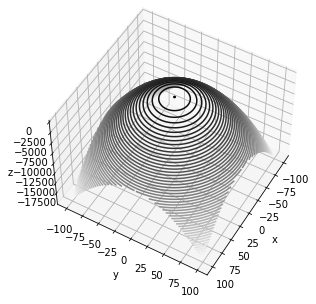

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x_range, y_range)
Z = black_box_function(X,Y)
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(50, 30)

In [4]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [5]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [6]:
# 2. Getting Started
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'x': (-10, 10), 'y': (-10, 10)}

# 세부 사항 설정
optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1
)

# 최대화!!
optimizer.maximize(init_points=2, n_iter=30 )
    # n_iter: 반복 횟수 (많을 수록 정확한 값을 얻을 수 있다)
    # init_points: 초기 랜덤 포인트 갯수

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 1         | -21.17    | -1.66     | 4.406     |
| 2         | -114.6    | -9.998    | -3.953    |
| 3         | -22.34    | -1.565    | 4.571     |
| 4         | -11.46    | 3.441     | -0.7845   |
| 5         | -139.6    | 10.0      | -6.375    |
| 6         | -72.45    | 6.804     | 5.211     |
| 7         | -4.212    | -0.8927   | -2.101    |
| 8         | -199.0    | -10.0     | 10.0      |
| 9         | -100.2    | -1.084    | -10.0     |
| 10        | -2.049    | 0.8119    | 1.546     |
| 11        | -5.661    | -2.578    | 0.1143    |
| 12        | 0.585     | 0.3725    | -0.5256   |
| 13        | -0.3316   | -0.8395   | 0.7917    |
| 14        | -6.512    | 1.361     | -2.379    |
| 15        | 0.3488    | -0.6797   | -0.435    |
| 16        | 0.8384    | 0.2248    | 0.3333    |
| 17        | -0.01893  | 1.009     | -0.001476 |
| 18        | 0.9969    | -0.04241  | 0.03632   |


In [7]:
# 최적의 (x, y) 값 결과 확인
print(optimizer.max)

{'target': 0.9968816802042866, 'params': {'x': -0.04241387079383685, 'y': 0.03632331702910818}}


In [8]:
optimizer.res[-5:] # 이전 history 를 확인 할 수 있다.

[{'target': 0.9955520213471597,
  'params': {'x': -0.057293660180928185, 'y': 0.03413817739588154}},
 {'target': 0.9424155010234477,
  'params': {'x': -0.23991710229543273, 'y': -0.004927778679601147}},
 {'target': 0.9946317604325212,
  'params': {'x': 0.06370263475489324, 'y': 0.03619687683714545}},
 {'target': 0.9901182987476215,
  'params': {'x': 0.09326471599761454, 'y': 0.0344004942153866}},
 {'target': 0.9878093772654108,
  'params': {'x': 0.0907630176195724, 'y': -0.06287048088871572}}]

In [9]:
# 2.1 Changing bounds
optimizer.set_bounds(new_bounds={"x": (-1, 1)})

# 이후 절차는 동일히다.
optimizer.maximize( init_points=0, n_iter=5)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 33        | 0.9957    | -0.05065  | -0.04108  |
| 34        | 0.9921    | 0.007579  | -0.08832  |
| 35        | 0.9984    | 0.02459   | -0.03094  |
| 36        | 0.999     | -0.0324   | -2.975e-0 |
| 37        | 0.9929    | -0.06256  | 0.05672   |


In [10]:
# 최적의 파라미터 값 확인
print(optimizer.max)

{'target': 0.9989504762105631, 'params': {'x': -0.032396340910251675, 'y': -2.9750019718832732e-05}}


### Ridge - Alpha 최적화

In [11]:
# 모듈 불러오기
from bayes_opt import BayesianOptimization
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

# seed 고정!
np.random.seed(0)
n_samples, n_features = 100, 1 # 100개의 데이터와 1개의 변수 생성

X = np.random.randn(n_samples, n_features) # shape = (100 , 1)
y = np.random.randn(n_samples) # shape = (100 , )


# CV 를 이용한, Ridge 파라미터 찾기
def Ridge_cv(alpha):
    '''
    :param alpha: Ridge's 하이퍼 파라미터
    :return: -RMSE --> 최소화를 위해 음수 부호를 붙힘
    '''

    RMSE = cross_val_score(Ridge(alpha=alpha), X, y, scoring='neg_mean_squared_error', cv=5).mean()

    return -RMSE

In [12]:
# 파라미터를 탐색할 공간
# Ridge는 0 ~ 10 사이에서 적절한 값을 찾는다.
pbounds = {'alpha': ( 0, 10 )}

# 베이지안 옵티마이제이션 객체를 생성
Ridge_BO = BayesianOptimization( f = Ridge_cv, pbounds  = pbounds , verbose=2, random_state=1 )

# 최대화!!!
Ridge_BO.maximize(init_points=2, n_iter = 10)

Ridge_BO.max # 찾은 파라미터 값 확인

|   iter    |  target   |   alpha   |
-------------------------------------
| 1         | 1.093     | 4.17      |
| 2         | 1.093     | 7.203     |
| 3         | 1.093     | 4.364     |
| 4         | 1.094     | 1.365     |
| 5         | 1.094     | 0.0       |
| 6         | 1.094     | 0.0       |
| 7         | 1.094     | 0.0       |
| 8         | 1.094     | 4.441e-16 |
| 9         | 1.094     | 0.0002297 |
| 10        | 1.094     | 0.0007334 |
| 11        | 1.094     | 0.001514  |
| 12        | 1.094     | 0.001514  |


{'target': 1.0941847591132594, 'params': {'alpha': 0.0}}

### SVC - C, gamma 를 최적화 하기

In [13]:
import numpy as np
import matplotlib
from matplotlib import pyplot  as plt
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

matplotlib.rc('font', family = 'Malgun Gothic')

iris = datasets.load_iris()
X = iris.data
y = iris.target

def SVM_rbf_cv(gamma, C):
    model = svm.SVC(kernel = 'rbf', gamma=gamma, C = C)
    RMSE = cross_val_score(model, X, y, scoring='accuracy', cv=5).mean()
    return -RMSE

In [14]:
# 주어진 범위 사이에서 적절한 값을 찾는다.
pbounds = {'gamma': ( 0.001, 1000 ), "C": (0.001, 1000)}

# 베이지안 옵티마이제이션 객체를 생성
SVM_rbf_BO = BayesianOptimization( f = SVM_rbf_cv, pbounds = pbounds, verbose = 2, random_state = 1 )

# 메소드를 이용해 최대화!
SVM_rbf_BO.maximize(init_points=2, n_iter = 10)

SVM_rbf_BO.max # 찾은 파라미터 값 확인

|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
| 1         | -0.4      | 417.0     | 720.3     |
| 2         | -0.4      | 0.1154    | 302.3     |


ValueError: array must not contain infs or NaNs

In [15]:
# 파라미터를 탐색할 공간
# Ridge는 0 ~ 10 사이에서 적절한 값을 찾는다.
pbounds = {'alpha': ( 0, 10 )}

# 베이지안 옵티마이제이션 객체를 생성
Ridge_BO = BayesianOptimization( f = Ridge_cv, pbounds  = pbounds , verbose=2, random_state=1 )

# 최대화!!!
Ridge_BO.maximize(init_points=2, n_iter = 10)

Ridge_BO.max # 찾은 파라미터 값 확인

|   iter    |  target   |   alpha   |
-------------------------------------
| 1         | 0.07506   | 4.17      |
| 2         | 0.07808   | 7.203     |
| 3         | 0.07825   | 7.397     |
| 4         | 0.0803    | 10.0      |
| 5         | 0.08005   | 9.655     |
| 6         | 0.08005   | 9.655     |
| 7         | 0.08005   | 9.655     |
| 8         | 0.08005   | 9.655     |
| 9         | 0.08005   | 9.655     |
| 10        | 0.08005   | 9.655     |
| 11        | 0.08005   | 9.655     |
| 12        | 0.08005   | 9.655     |


{'target': 0.08030318669592917, 'params': {'alpha': 10.0}}

### XGB - learning_rate, max_depth 등 최적화 하기

In [16]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import xgboost as xgb


iris = datasets.load_iris()
X = iris.data
y = iris.target


def XGB_cv(max_depth,learning_rate, n_estimators, gamma
           ,min_child_weight, max_delta_step, subsample
           ,colsample_bytree, silent=True, nthread=-1):
    model = xgb.XGBClassifier(max_depth=int(max_depth),
                              learning_rate=learning_rate,
                              n_estimators=int(n_estimators),
                              silent=silent,
                              nthread=nthread,
                              gamma=gamma,
                              min_child_weight=min_child_weight,
                              max_delta_step=max_delta_step,
                              subsample=subsample,
                              colsample_bytree=colsample_bytree)
    RMSE = cross_val_score(model, X, y, scoring='accuracy', cv=5).mean()
    return -RMSE

# 주어진 범위 사이에서 적절한 값을 찾는다.
pbounds = {'max_depth': (5, 10),
          'learning_rate': (0.01, 0.3),
          'n_estimators': (50, 1000),
          'gamma': (1., 0.01),
          'min_child_weight': (2, 10),
          'max_delta_step': (0, 0.1),
          'subsample': (0.7, 0.8),
          'colsample_bytree' :(0.5, 0.99)
          }

xgboostBO = BayesianOptimization(f = XGB_cv,pbounds = pbounds, verbose = 2, random_state = 1 )

# 메소드를 이용해 최대화!
xgboostBO.maximize(init_points=2, n_iter = 10)

xgboostBO.max # 찾은 파라미터 값 확인

|   iter    |  target   | colsam... |   gamma   | learni... | max_de... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------------------
[07:39:52] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:39:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:39:53] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:39:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:39:54] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:39:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:39:55] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:39:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:39:55] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:39:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
| 1         | -0.9467   | 0.7043    | 0.2869    | 0.01003   | 0.03023   | 5.734     | 2.739     | 226.9     | 0.7346    |
[07:39:56] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being use

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:39:57] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:39:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:39:57] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:39:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:39:57] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:39:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:39:58] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:39:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
| 2         | -0.9467   | 0.6944    | 0.4666    | 0.1316    | 0.06852   | 6.022     | 9.025     | 76.02     | 0.767     |


ValueError: array must not contain infs or NaNs

In [17]:
fit_xgb = xgb.XGBClassifier(max_depth= int( xgboostBO.max['params']['max_depth'] ),
                             learning_rate=xgboostBO.max['params']['learning_rate'],
                             n_estimators=int(xgboostBO.max['params']['n_estimators']),
                             gamma= xgboostBO.max['params']['gamma'],
                             min_child_weight=xgboostBO.max['params']['min_child_weight'],
                             max_delta_step=xgboostBO.max['params']['max_delta_step'],
                             subsample=xgboostBO.max['params']['subsample'],
                             colsample_bytree=xgboostBO.max['params']['colsample_bytree'])

In [18]:
model  = fit_xgb.fit(X,y)

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:40:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
